# Food Poisoning Claims Analysis

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**


## BACKGROUND OF THE ANALYSIS
Vivendo is a fast food chain in Brazil with over 200 outlets. Customers often claim compensation from the company for food poisoning. The legal team processes these claims. The legal team has offices in four locations.

# Dataset

## EXPLORATORY ANALYSIS
This part will deal with exploring the database to know what’s available in it: The tables, the relationships between them, and the type of data stored in them.
I used head(food_claims) function to get an instant overview of the table and see how the dataset was arranged. This showed the first six rows of the dataset. The dataset contains one row for each claim. It contains eight columns
Using colnames(food_claims), showed 8 columns (claim_id, time_to_close, claim_amount, amount_paid, location, individuals_on_claim, linked_cases, cause)
## i. claim_id: 
Its a nominal variable. This column represents the unique identifier for each claim. It is used to differentiate one claim from another.
ii.time_to_close: This is a discrete variable. This column indicates the time it took to close the claim, measured in some unit of time (possibly days or hours). It provides information about the duration between the claim being filed and its resolution.

## iii. claim_amount:
 This is a continuous variable. This column specifies the total amount of the claim, typically denominated in a specific currency (in this case, represented as “R$”). It represents the financial value associated with the claim.

## iv. amount_paid: 
This is a continous variable. This column indicates the amount that has been paid towards the claim. It represents the portion of the claim amount that has already been settled or reimbursed.

## v. location: 
This is a nominal variable. This column represents the location associated with the claim. It could refer to the city or region where the claim was filed or where the incident related to the claim occurred.

## vi. individuals_on_claim:
This contains discrete variables. This column specifies the number of individuals involved in the claim. It indicates the count of people who are associated with or listed on the claim.

## vii. linked_cases: 
Nominal data. Whether this claim is linked to other cases. Either TRUE or FALSE.

## viii. Cause:
Nominal data. Cause of the food poisoning. One of “vegetable”, “meat” or “unknown”.

## 2. DATA MANIPULATION AND CLEANING

I started my data-cleaning process by looking out for missing values using missing_counts = food_claims.isna().sum() . This function helped me detect 36 missing values in amount_paid column and 26 missing values in the linked_cases column. To replace these missing values, first, i summarized the amount_paid column to know the median value. I used the median value to replace the missing values in amount_paid.

In [1]:
import pandas as pd
import numpy as np
# reading the datasets
new = pd.read_csv("food_claims.csv")

In [2]:
import pandas as pd
food_claims = pd.read_csv('food_claims.csv')
food_claims

,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
0,1,317,R$ 74474.55,51231.37,RECIFE,15,False,unknown
1,2,195,R$ 52137.83,42111.30,FORTALEZA,12,True,unknown
2,3,183,R$ 24447.2,23986.30,SAO LUIS,10,True,meat
3,4,186,R$ 29006.28,27942.72,FORTALEZA,11,False,meat
4,5,138,R$ 19520.6,16251.06,RECIFE,11,False,vegetable
...,...,...,...,...,...,...,...,...
1995,1996,176,R$ 28982.3,24265.02,RECIFE,10,False,meat
1996,1997,166,R$ 5188.44,4772.77,FORTALEZA,2,True,meat
1997,1998,179,R$ 11975.85,10087.81,RECIFE,4,True,meat
1998,1999,162,R$ 23516.28,23310.24,RECIFE,9,False,meat


# Data Validation

In [3]:
import pandas as pd
missing_counts = food_claims.isna().sum()

print(missing_counts)


claim_id                 0
time_to_close            0
claim_amount             0
amount_paid             36
location                 0
individuals_on_claim     0
linked_cases            26
cause                    0
dtype: int64


After reading the CSV file, the first thing we do is checking data type of each column with the dtype attribute and calculating missing values.

The original data is 2000 rows and 8 columns.

There are

36 missing values in amount_paid,
26 missing values in linked_cases,
so we need to fill them.

It shows that claim_amount is an object, so we need to make data conversions to float64 to match the criteria of the data dictionary.

To replace these missing values, i created a duplicate dataset called new_food_claims and used the function below to replace the missing values for amount paid;

In [4]:
import pandas as pd

# Create a copy of the 'food_claims' DataFrame
new_food_claims = food_claims.copy()

# Replace missing values in 'amount_paid' column with 20106
new_food_claims['amount_paid'].fillna(20106, inplace=True)

# Now the 'new_food_claims' DataFrame contains the copied data with missing values replaced


To replace the missing values in linked cases which contains booleon data types, i replaced them with ‘false’.

In [5]:
import pandas as pd

# Replace missing values in 'linked_cases' column with 'False'
new_food_claims['linked_cases'].fillna('False', inplace=True)

# Now the 'new_food_claims' DataFrame contains the copied data with missing values replaced


Next step in the data cleaning process is to remove the the currency sign on the claim_amount column which does not make the records consistent with amount_paid column. To do this i used the function below,

In [6]:
import pandas as pd

# Remove "R$ " prefix from 'claim_amount' column
new_food_claims['claim_amount'] = new_food_claims['claim_amount'].str.replace("R\$ ", "", regex=True)


to make it numerical, i used the function below,

In [7]:
import pandas as pd
# Remove "R$ " prefix and convert 'claim_amount' column to numeric
new_food_claims['claim_amount'] = pd.to_numeric(new_food_claims['claim_amount'].str.replace("R\$ ", "", regex=True))


# Data Validation Results

Below is a snapshot of the new dataset after cleaning

In [8]:
new_food_claims

,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
0,1,317,74474.55,51231.37,RECIFE,15,False,unknown
1,2,195,52137.83,42111.30,FORTALEZA,12,True,unknown
2,3,183,24447.20,23986.30,SAO LUIS,10,True,meat
3,4,186,29006.28,27942.72,FORTALEZA,11,False,meat
4,5,138,19520.60,16251.06,RECIFE,11,False,vegetable
...,...,...,...,...,...,...,...,...
1995,1996,176,28982.30,24265.02,RECIFE,10,False,meat
1996,1997,166,5188.44,4772.77,FORTALEZA,2,True,meat
1997,1998,179,11975.85,10087.81,RECIFE,4,True,meat
1998,1999,162,23516.28,23310.24,RECIFE,9,False,meat


## 3. SUMMARY STATISTICS

Since I will be providing a graphical representation of my insights, the summary statistics will provide insights into the distribution and central tendency of the numeric variables, helping me understand the range and typical values in the dataset.

In [9]:
import pandas as pd

# Generate summary statistics for 'new_food_claims'
summary_stats = new_food_claims.describe(include='all')

# Print the summary statistics
print(summary_stats)

           claim_id  time_to_close  ...  linked_cases  cause
count   2000.000000     2000.00000  ...          2000   2000
unique          NaN            NaN  ...             3      5
top             NaN            NaN  ...         False   meat
freq            NaN            NaN  ...          1493    943
mean    1000.500000      185.56800  ...           NaN    NaN
std      577.494589       49.16339  ...           NaN    NaN
min        1.000000       76.00000  ...           NaN    NaN
25%      500.750000      158.00000  ...           NaN    NaN
50%     1000.500000      179.00000  ...           NaN    NaN
75%     1500.250000      204.00000  ...           NaN    NaN
max     2000.000000      518.00000  ...           NaN    NaN

[11 rows x 8 columns]


## time_to_close: 
The minimum time taken to close a claim is 76, while the maximum time is 518. The first quartile (25th percentile) is 158, meaning that 25% of the claims were closed within this time frame or less. The median (50th percentile) is 179, indicating that half of the claims were closed within this time or less. The third quartile (75th percentile) is 204, meaning that 75% of the claims were closed within this time frame or less. The mean time to close a claim is approximately 185.6.
## claim_amount: 
The minimum claim amount is 1638, and the maximum claim amount is 76107. The first quartile is 13759, indicating that 25% of the claims have an amount equal to or less than this value. The median is 24821, which means that half of the claims have an amount equal to or less than this value. The third quartile is 38581, indicating that 75% of the claims have an amount equal to or less than this value. The mean claim amount is approximately 27157.
amount_paid: The minimum amount paid for a claim is 1517, and the maximum is 52499. The first quartile is 11107, which means that 25% of the claims were paid an amount equal to or less than this value. The median is 20106, indicating that half of the claims received an amount equal to or less than this value. The third quartile is 30473, meaning that 75% of the claims were paid an amount equal to or less than this value. The mean amount paid for claims is approximately 21516.
## individuals_on_claim:
The minimum number of individuals on a claim is 1, while the maximum is 15. The first quartile is 4, indicating that 25% of the claims had four or fewer individuals associated with them. The median is 8, meaning that half of the claims had eight or fewer individuals. The third quartile is 12, indicating that 75% of the claims had twelve or fewer individuals. The mean number of individuals on claims is approximately 8.05.

For the character columns (claim_id, location, linked_cases and cause), the summary statistics provide information about the lengths and class of the columns but do not provide meaningful numeric summaries since these columns contain categorical or textual information.

# 4. VISUALIZATION

How number of claims differs from each location

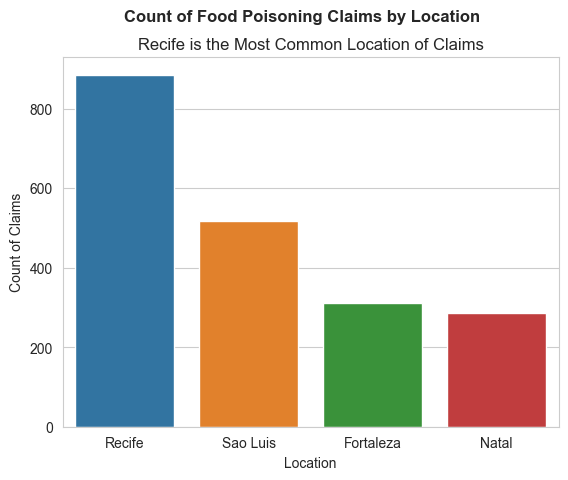

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the plotting style
sns.set_style("whitegrid")

# Create a countplot for locations
locations = ["Recife", "Sao Luis", "Fortaleza", "Natal"]
sns.countplot(x=new_food_claims["location"].str.title(), order=locations)

# Set titles and labels
plt.suptitle("Count of Food Poisoning Claims by Location", fontweight="bold")
plt.title("Recife is the Most Common Location of Claims")
plt.xlabel("Location")
plt.ylabel("Count of Claims")

# Show the plot
plt.show()


Alternatively, you have the opportunity to explore the visualizations I have crafted within Power BI.![How number of claims differs from each location](photo1.png)

From the graph, we can observe that: The location with the highest number of individual claims is **RECIFE**, represented by the 7,101 claims. This suggests that **RECIFE** has the highest concentration of claims involving multiple individuals. **SAO LUIS** follows with 4,101 claims. **FORTALEZA** and **NATAL** have relatively similar numbers of individual claims, with bars of similar heights, as represented by 2,508 and 2,329 respectively. This indicates a comparable level of claims involving fewer individuals in these two locations.  Its clear with the above distribution that the observations are not balanced across each locations with some locations(**Recife**) having extremely higher claims and others(Natal) having fewer claims.

How each location differs in the time it takes to close claims.

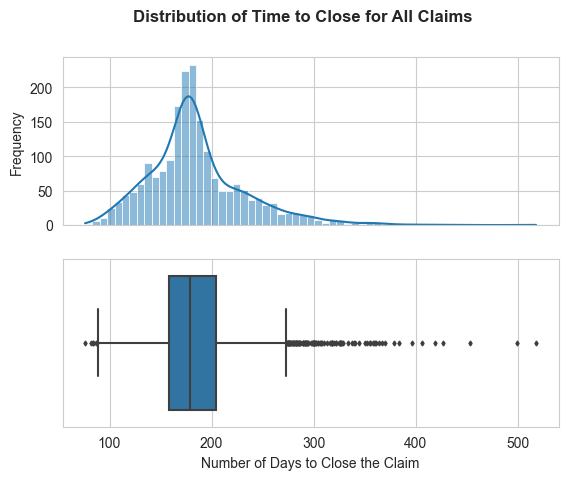

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure with subplots
fig, (ax_hist, ax_box) = plt.subplots(2, sharex='all')

# Create histogram and box plot
sns.histplot(data=new_food_claims, x="time_to_close", kde=True, ax=ax_hist)
sns.boxplot(data=new_food_claims, x="time_to_close", ax=ax_box, fliersize=2.5)

# Set title and labels
fig.suptitle("Distribution of Time to Close for All Claims", fontsize=12, fontweight="bold")
ax_hist.set_ylabel("Frequency")
ax_box.set_xlabel("Number of Days to Close the Claim")

# Show the plot
plt.show()


Looking at the number of days to close the claim, we can see that most claims (75th percentile) had been closed in 200 days. The median time to close the claim is 179 days.  Some outliers take more than 300 days but this is less common.

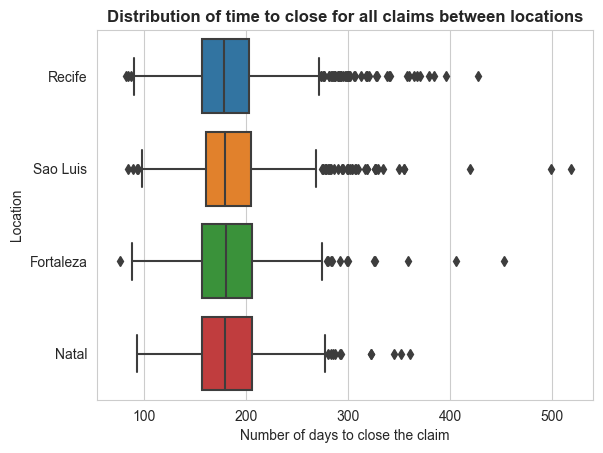

In [13]:
sns.boxplot(
    y=new_food_claims["location"].str.title(),
    x=new_food_claims["time_to_close"],
    order=["Recife", "Sao Luis", "Fortaleza", "Natal"],
)

plt.title(
    "Distribution of time to close for all claims between locations", fontweight="bold"
)
plt.xlabel("Number of days to close the claim")
plt.ylabel("Location")

plt.show()

Although distribution of time to close the claim looks similar between locations, the number of outliers is higher in Recife and São Luis. This would suggest that claims than take more than 300 days to close come from these locations. This could be an effect of having the larger than Fortaleza and Natal number of claims, so the large number of claims brings number of days to close the claim up.

We can conduct ANOVA to see if there is any statistically significant difference between locations.

In [14]:
import pingouin as pg

# Perform ANOVA
anova_result = pg.anova(
    data=new_food_claims,
    dv="time_to_close",
    between="location"
).round(3)

# Print ANOVA results
print(anova_result)


     Source  ddof1  ddof2      F  p-unc  np2
0  location      3   1996  0.303  0.823  0.0


We fail to reject the null hypothesis because 
 is greater than 
. It means that there is no statistically significant difference between locations.

Based on all of the above, we recommend team to also consider if correlation between other variables and time to close the claim exists. Further analysis is recommended and provided below.

# Added Questions

## Individuals on claim influence to time to close the claim.
We can add individuals on claim to previous plot using hue.

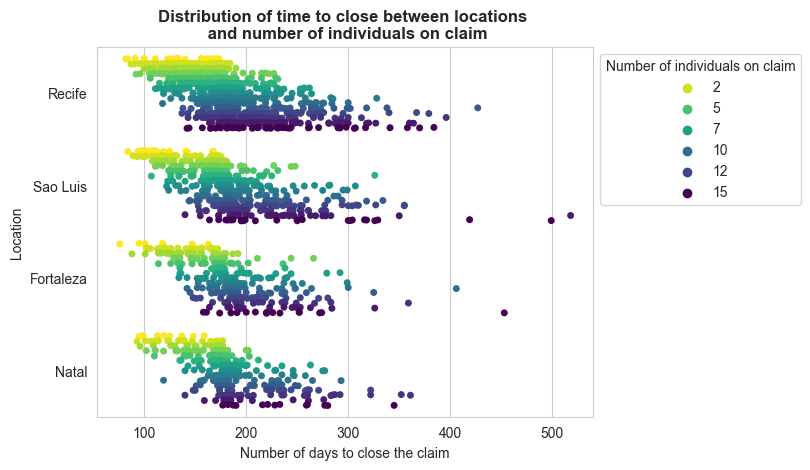

In [15]:
ax = sns.stripplot(
    data=new_food_claims,
    x="time_to_close",
    y=new_food_claims["location"].str.title(),
    order=["Recife", "Sao Luis", "Fortaleza", "Natal"],
    hue="individuals_on_claim",
    palette="viridis_r",
    dodge=True,
)

plt.title(
    "Distribution of time to close between locations \n and number of individuals on claim",
    fontweight="bold",
)
plt.xlabel("Number of days to close the claim")
plt.ylabel("Location")
plt.legend(title="Number of individuals on claim")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.show()

As we can see, number of individuals on claim strongly impacts number of days to close the claim. We can explore this relation using box plot and calculating correlation coefficient.

## Relation between location and cause of poisoning.

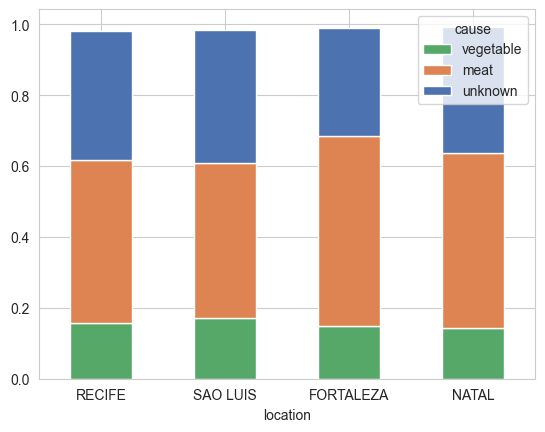

In [16]:
new_food_claims.groupby("location")[["cause"]].value_counts(normalize=True).unstack().reindex(
    ["RECIFE", "SAO LUIS", "FORTALEZA", "NATAL"]
).reindex(columns=["vegetable", "meat", "unknown"]).plot(
    kind="bar",
    stacked=True,
    color=["#55a868", "#dd8452", "#4c72b0"],
)
plt.xticks(rotation=0)
plt.show()

Check if location and cause of poisoning are associated.

# Findings

- Recife has the most claims, with São Luis being second although with almost half the number of claims. The other two locations, Fortaleza and Natal, have almost the same number of claims, around half the number of claims in São Luis.
- Time to close the claim has no statistically significant difference between locations
- Number of individuals on claim has moderate positive correlation (correlation coefficient 0.61) on number of days to close the claim.
- Linked claims have less spread in number of days to close the claim.
- Cause of poisoning and location are independent.
- Causes of poisoning influence the time to close the claim. Vegetable cause in likely to be closed in 180 days, unknown cause claims likely to have greater time to close.

## Conclusion
This marks the conclusion of my practical exam in data analysis. Throughout this project, I have diligently cleaned and visualized the data from the food_claims dataset. I am hopeful that you will appreciate and acknowledge the effort I have put into this task.

As a note, English is not my native language, so I have made my best attempt to communicate my findings effectively. I apologize for any grammar mistakes or language nuances that may have arisen.

In summary, I have worked diligently to prepare and present the data in a structured and informative manner. The visualizations I have created aim to provide insights into the dataset, uncover patterns, and offer a comprehensive understanding of the information at hand. I understand the importance of data analysis in extracting meaningful insights and informing decisions, and I am pleased to have had the opportunity to apply my skills in this practical exam.

Thank you for considering my work, and I am open to any feedback or suggestions for improvement. Your guidance and insights would be invaluable as I continue to develop my skills in the field of data analysis.

Once again, thank you for the opportunity to undertake this practical exam. I look forward to your evaluation and feedback.

Sincerely,
Samir Ismayilov